In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [10]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


### Data pre processing

In [5]:
data.shape # shape checking rows - 7920 col - 3

(7920, 3)

In [7]:
data.duplicated() # checking duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [53]:
data.duplicated().sum() # gettinb duplicated as a count

np.int64(0)

In [54]:
data.isnull().sum() # null values checking

id       0
label    0
tweet    0
dtype: int64

### Text pre processing
1) convert upper case to lowercase
2) remove links
3) remove punctuations
4) remove numbers
5) remove stopwords
6) stemming

In [55]:
import re
import string

### Convert uppercase to lowercase

In [56]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [57]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split())) # tweet column to lowercase

In [58]:
data["tweet"].head() # dataset in lowercase

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### Removing links

In [59]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [60]:
data["tweet"].head() # we can see without links

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### Remove Punctuations

In [61]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(
    word.translate(str.maketrans('', '', string.punctuation)) 
    for word in x.split()
))

In [62]:
data["tweet"].head(10) # get first 10

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

In [63]:
data["tweet"].tail(10) # get last 10

7910    perfect match instagood applewatch red instagr...
7911         complet love new iphon emoji iphon appl emoj
7912    tune turn drop gtd one app mobil mind medit op...
7913    ok galaxi crash one day wait til monday skyroc...
7914    gain follow rt must follow follow back follow ...
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

### Removing numbers

In [64]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True) # removing numbers

In [65]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911         complet love new iphon emoji iphon appl emoj
7912    tune turn drop gtd one app mobil mind medit op...
7913    ok galaxi crash one day wait til monday skyroc...
7914    gain follow rt must follow follow back follow ...
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

### Remove Stopwords

In [129]:
!pip install nltk
import nltk

In [130]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [131]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [132]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [133]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [134]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### Stemming

In [135]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [136]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split())) # getting base words

In [137]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [138]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [139]:
from collections import Counter
vocab = Counter()

In [140]:
vocab

Counter()

In [141]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [142]:
len(vocab)

15867

In [143]:
data.shape

(7920, 3)

In [144]:
tokens =[key for key in vocab if vocab[key] > 10]

In [145]:
len(tokens)

1142

In [146]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    with open(filename, 'w', encoding="utf-8") as file:
        file.write(data)
        file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [147]:
x = data['tweet']
y = data['label']

In [148]:
!pip install scikit-learn

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 20% for test 80% train

In [150]:
x_train.shape

(6336,)

In [151]:
x_test.shape

(1584,)

### Vectorization

In [152]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [153]:
vectorized_x_train = vectorizer(x_train, tokens)

In [154]:
vectorized_x_test = vectorizer(x_test, tokens)

In [155]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1142), dtype=float32)

In [156]:
y_test

835     0
2422    0
5946    0
5631    0
445     0
       ..
4579    1
2368    0
6067    0
605     0
7022    0
Name: label, Length: 1584, dtype: int64

In [157]:
y_train.value_counts()

label
0    4722
1    1614
Name: count, dtype: int64

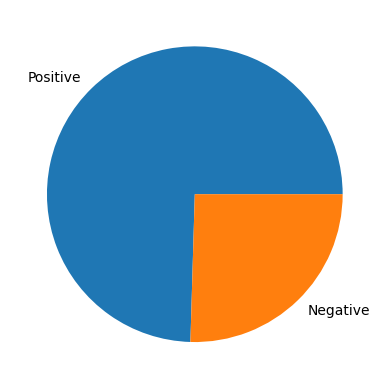

In [158]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [159]:
!pip install imbalanced-learn

In [160]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9444, 1142) (9444,)


In [161]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [162]:
y_train_smote.value_counts()

label
0    4722
1    4722
Name: count, dtype: int64

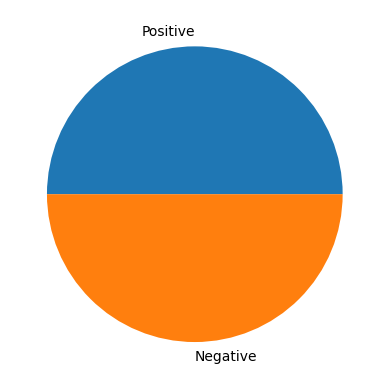

In [163]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [164]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9439    1
9440    1
9441    1
9442    1
9443    1
Name: label, Length: 9444, dtype: int64

In [165]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1142), dtype=float32)

In [167]:
y_test

835     0
2422    0
5946    0
5631    0
445     0
       ..
4579    1
2368    0
6067    0
605     0
7022    0
Name: label, Length: 1584, dtype: int64

### Model training and Evaluation

In [205]:
!pip install scikit-learn

In [188]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Validation Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.936
	Precision = 0.914
	Recall = 0.962
	F1-Score = 0.937
Validation Scores:
	Accuracy = 0.877
	Precision = 0.734
	Recall = 0.825
	F1-Score = 0.777


### Naive Bayes

In [199]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.905
	Precision = 0.869
	Recall = 0.954
	F1-Score = 0.91
Validation Scores:
	Accuracy = 0.874
	Precision = 0.695
	Recall = 0.92
	F1-Score = 0.792


### Decision Tree

In [201]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dtc.predict(vectorized_x_train_smote)
y_test_pred = dtc.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Validation Scores:
	Accuracy = 0.812
	Precision = 0.65
	Recall = 0.604
	F1-Score = 0.626


### Random Forest 

In [202]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rfc.predict(vectorized_x_train_smote)
y_test_pred = rfc.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Validation Scores:
	Accuracy = 0.867
	Precision = 0.762
	Recall = 0.709
	F1-Score = 0.735


### Support Vector Machine

In [204]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svc.predict(vectorized_x_train_smote)
y_test_pred = svc.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.997
	F1-Score = 0.978
Validation Scores:
	Accuracy = 0.884
	Precision = 0.765
	Recall = 0.799
	F1-Score = 0.781


In [196]:
import pickle

with open('../static/model/model.pickel', 'wb') as file:
    pickle.dump(lr, file)